In [64]:
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_dir = 'face_data/with_mask'
without_mask_dir = 'face_data/without_mask'

In [66]:
with_mask_images = os.listdir(with_mask_dir)
without_mask_images = os.listdir(without_mask_dir)

In [67]:
#check the number of image with mask and without mask
print('Number of with mask images:', len(with_mask_images))
print('Number of without mask images:', len(without_mask_images))

Number of with mask images: 3725
Number of without mask images: 3828


# creating the Labels for image with mask and without mask

### with mask -->1
### without mask --> 0

In [68]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [69]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [70]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [71]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Dsisplay the Image

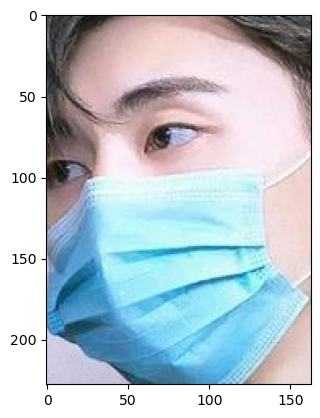

In [ ]:
# displaying with mask image
img = mpimg.imread('face_data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

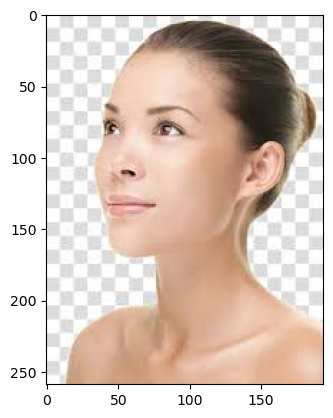

In [ ]:
# displaying without mask image
img = mpimg.imread('face_data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image preprocessing
### 1 resizing the images
### 2 convet the image to numpy arrays

In [ ]:
# convert images to numpy arrays+
with_mask_path = 'face_data/with_mask/'

data = []

for img_file in with_mask_images:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = 'face_data/without_mask/'

for img_file in without_mask_images:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
data[0]

In [ ]:
type(data[0])

In [ ]:
data[0].shape

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

In [ ]:
type(Y)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
print(Y)

## Split the data in train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

## Build the modelConvolution neural Network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - acc: 0.7018 - loss: 0.6968 - val_acc: 0.8893 - val_loss: 0.2734
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 36s 214ms/step - acc: 0.8914 - loss: 0.2860 - val_acc: 0.9190 - val_loss: 0.2345
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 203ms/step - acc: 0.9125 - loss: 0.2381 - val_acc: 0.9140 - val_loss: 0.2281
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 203ms/step - acc: 0.9270 - loss: 0.1888 - val_acc: 0.9339 - val_loss: 0.1985
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 201ms/step - acc: 0.9382 - loss: 0.1633 - val_acc: 0.9207 - val_loss: 0.2242


### Model Evaluation

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.9335 - loss: 0.1750
Test Accuracy = 0.9331568479537964


### Analize the grapgh

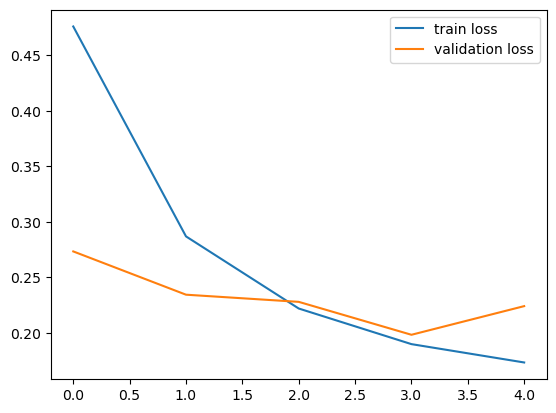

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

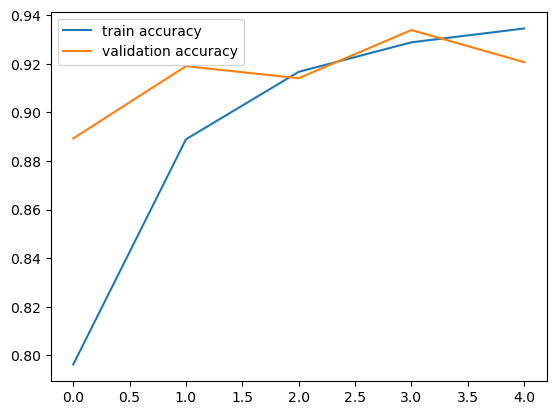

In [39]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [59]:
import cv2
from tensorflow.keras.models import load_model

In [60]:
print("Raw prediction:", input_prediction)
print("Shape:", input_prediction.shape)

Raw prediction: [[0.38535017 0.611853  ]]
Shape: (1, 2)


### save the model

In [ ]:
model.save("mask_img_analyzer.h5")

### prediction system

Enter the path of the image to be predicted:  data/without_mask/without_mask_1011.jpg


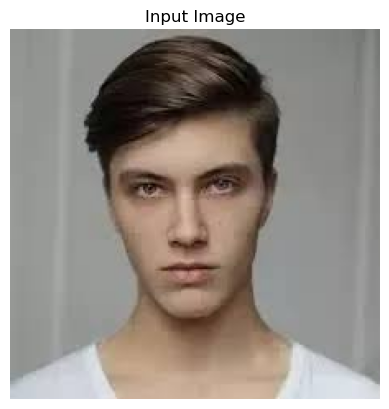

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Raw prediction probabilities: [[0.7597908  0.05818209]]
Predicted Label: 0
The person in the image is not wearing a mask 


In [ ]:
# create the prediction system
# Get image path from user
input_image_path = input('Enter the path of the image to be predicted: ')

# Load the trained model
model = load_model('mask_img_analyzer.h5')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if image was loaded successfully
if input_image is None:
    print("Error: Could not read image. Please check the file path.")
else:
    # Convert BGR to RGB for consistent preprocessing and display
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Display the input image
    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    # Preprocess the image (match training preprocessing)
    input_image_resized = cv2.resize(input_image_rgb, (128, 128))  # Resize to 128x128
    input_image_scaled = input_image_resized / 255.0  # Scale pixel values to [0,1]
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])  # Reshape for model input

    # Make prediction
    prediction = model.predict(input_image_reshaped)
    print("Raw prediction probabilities:", prediction)

    # Get predicted label
    predicted_label = np.argmax(prediction, axis=1)[0]
    print("Predicted Label:", predicted_label)

    # Interpret the prediction
    if predicted_label == 1:
        print('The person in the image is wearing a mask ')
    else:
        print('The person in the image is not wearing a mask ')

Enter the path of the image to be predicted:  data/with_mask/with_mask_9.jpg


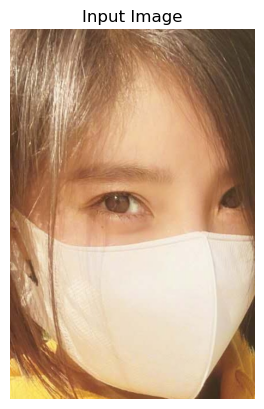

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Raw prediction probabilities: [[0.15966773 0.77193177]]
Predicted Label: 1
The person in the image is wearing a mask 


In [63]:
# create the prediction system
# Get image path from user
input_image_path = input('Enter the path of the image to be predicted: ')

# Load the trained model
model = load_model('mask_img_class.h5')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if image was loaded successfully
if input_image is None:
    print("Error: Could not read image. Please check the file path.")
else:
    # Convert BGR to RGB for consistent preprocessing and display
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Display the input image
    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    # Preprocess the image (match training preprocessing)
    input_image_resized = cv2.resize(input_image_rgb, (128, 128))  # Resize to 128x128
    input_image_scaled = input_image_resized / 255.0  # Scale pixel values to [0,1]
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])  # Reshape for model input

    # Make prediction
    prediction = model.predict(input_image_reshaped)
    print("Raw prediction probabilities:", prediction)

    # Get predicted label
    predicted_label = np.argmax(prediction, axis=1)[0]
    print("Predicted Label:", predicted_label)

    # Interpret the prediction
    if predicted_label == 1:
        print('The person in the image is wearing a mask ')
    else:
        print('The person in the image is not wearing a mask ')